In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def compute_similarity(image1_path, image2_path):
    # Load the images
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        raise ValueError("One or both of the image paths are invalid.")

    # Initialize the akaze detector
    akaze = cv2.AKAZE_create()

    # Detect keypoints and compute descriptors
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)

    # Initialize the BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort them in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Apply RANSAC to find the best transformation
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Use RANSAC to find the best transformation matrix
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Calculate the number of inliers
    num_inliers = np.sum(mask)

    # Compute the similarity score based on the number of inliers
    similarity_score = num_inliers / len(matches)

    return similarity_score

# Example usage:
image1_path = 'nk_collection_meubels_cleaned/meubel_1.jpg'
image2_path = 'nk_collection_meubels_cleaned/meubel_2.jpg'

similarity_score = compute_similarity(image1_path, image2_path)
print(f"Similarity Score: {similarity_score}")


Similarity Score: 0.675967596759676


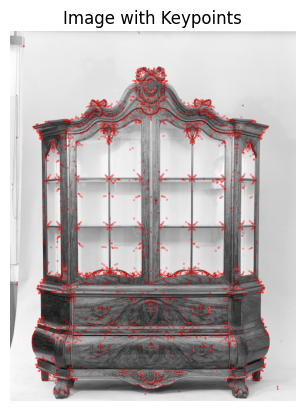

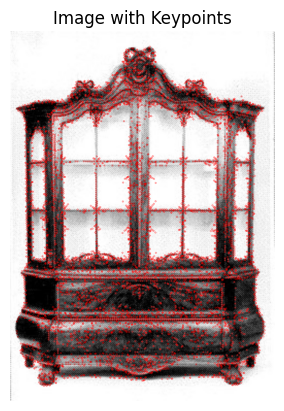

In [6]:
def visualize_keypoints(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("The image path is invalid.")

    # Initialize the AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect keypoints and descriptors with AKAZE
    kp, des = akaze.detectAndCompute(img, None)

    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0), flags=cv2.DrawMatchesFlags_DEFAULT)

    # Display the image with keypoints
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title('Image with Keypoints')
    plt.axis('off')
    plt.show()

visualize_keypoints(image1_path)
visualize_keypoints(image2_path)